# Predicting Melbourne Housing Prices 

Create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

In [76]:
# Import Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.decomposition import PCA 

#Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso 
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
%matplotlib inline 
sns.set_style('white')

In [2]:
# load and preview data set 
housing_original = pd.read_csv('Melbourne_housing_FULL.csv')
pd.options.display.max_columns = 50
housing_original.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### About the Data

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory

### Data Exploration and Feature Engineering 

In [3]:
# Check shape of the data 
housing_original.shape

(34857, 21)

In [4]:
housing_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [5]:
# Converting date to a date object
housing_original['Date'] = pd.to_datetime(housing_original['Date'])

In [6]:
# Examine properties of variebles 
housing_original.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


We can see that some of the values are not accurate. There are houses whose bathroom count is zero, building area is zero, and built in year 2106. let's examine them more and fix the error. 

In [7]:
# Houses with future building dates 
housing_future=housing_original[housing_original['YearBuilt'] > 2017]
housing_future

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2096,Brighton East,8 Thomas St,2,h,1310000.0,S,Buxton,2016-09-24,10.7,3187.0,4.0,3.0,2.0,302.0,250.0,2018.0,Bayside City Council,-37.91820,145.02310,Southern Metropolitan,6938.0
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,2016-07-11,11.8,3105.0,4.0,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.76370,145.08810,Eastern Metropolitan,4480.0
31564,Bulleen,22 Derreck Av,4,h,1310000.0,VB,Jellis,2018-03-03,10.8,3105.0,4.0,3.0,2.0,358.0,243.0,2018.0,Manningham City Council,-37.76281,145.09159,Eastern Metropolitan,4480.0
33033,Bentleigh,1 Wyuna Ct,3,h,1100000.0,VB,Woodards,2018-03-17,11.4,3204.0,3.0,1.0,4.0,635.0,242.0,2019.0,Glen Eira City Council,-37.92963,145.03666,Southern Metropolitan,6795.0
34760,Sunshine North,40 Warwick Rd,3,h,890000.0,S,Ray,2018-02-24,10.5,3020.0,3.0,2.0,2.0,695.0,153.0,2018.0,Brimbank City Council,-37.76883,144.83974,Western Metropolitan,4217.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0


Years 2017 and above represent future years for the dataset. While it is still possible for houses which will be completed in the near future to be sold earlier, houses with building year of 2106 clearly indicates that all other future years are entered by mistake and we'll remove them. 

In [8]:
# Remove future build years
housing = housing_original[housing_original['YearBuilt']<2018]

In [9]:
# First five houses with zero Landsize
housing[housing['Landsize']==0].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,2.0,2.0,1.0,0.0,94.0,2009.0,Yarra City Council,-37.8078,144.9965,Northern Metropolitan,4019.0
31,Abbotsford,16/11 Nicholson St,3,u,NaN,PI,Philip,2016-04-16,2.5,3067.0,3.0,2.0,2.0,0.0,129.0,2010.0,Yarra City Council,-37.8093,144.9959,Northern Metropolitan,4019.0
40,Abbotsford,13/11 Nicholson St,3,t,900000.0,S,Beller,2017-03-18,2.5,3067.0,3.0,2.0,2.0,0.0,NaN,2010.0,Yarra City Council,-37.8093,144.9959,Northern Metropolitan,4019.0
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,2.0,1.0,1.0,0.0,60.0,1970.0,Yarra City Council,-37.8015,144.9972,Northern Metropolitan,4019.0
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,1.0,1.0,1.0,0.0,50.0,2013.0,Yarra City Council,-37.8055,144.9961,Northern Metropolitan,4019.0


Lnad size might refer to the amount of land between the house and the edge of the property and hence for houses built very close to their border line with the street or whatever is next to them, a zero value might be valid.  

In [10]:
# number of houses with zero BuildingArea
len(housing[housing['BuildingArea']==0])

74

In [11]:
housing = housing[housing['BuildingArea']!=0]

In [12]:
# houses with zero bathroom count
housing[housing['Bathroom']==0].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2716,Camberwell,5 Nicholsdale Rd,4,h,1400000.0,PI,Jellis,2016-04-16,7.8,3124.0,3.0,0.0,0.0,693.0,NaN,1935.0,Boroondara City Council,-37.8360,145.0914,Southern Metropolitan,8920.0
13058,Ivanhoe,1/53 Norman St,3,t,1060000.0,S,Purplebricks,2017-04-29,7.9,3079.0,3.0,0.0,0.0,219.0,NaN,1980.0,Banyule City Council,-37.7679,145.0466,Eastern Metropolitan,5549.0


In [13]:
# Setting all properties with zero bathrooms to one
housing.Bathroom = housing.Bathroom.map(lambda x: x if x>0 else 1)

In [14]:
# Confirm removals
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,15471.000000,1.201900e+04,15471.000000,15471.000000,15471.000000,15471.000000,15220.000000,13655.000000,13158.000000,15471.000000,15462.000000,15462.000000,15471.000000
mean,3.107298,1.077202e+06,11.143468,3116.987331,3.088941,1.670286,1.703417,531.295496,154.748288,1965.224808,-37.809518,144.998947,7519.485748
std,0.986656,6.714761e+05,6.940604,115.133547,1.008997,0.735257,1.000861,1054.712411,88.466134,37.323282,0.090024,0.119848,4304.344446
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.010000,1196.000000,-38.190430,144.423790,249.000000
25%,2.000000,6.320000e+05,6.300000,3047.000000,2.000000,1.000000,1.000000,203.500000,103.000000,1940.000000,-37.861300,144.930665,4442.000000
50%,3.000000,8.850000e+05,10.100000,3101.000000,3.000000,2.000000,2.000000,470.000000,136.000000,1970.000000,-37.807800,145.004690,6763.000000
75%,4.000000,1.320000e+06,14.000000,3155.000000,4.000000,2.000000,2.000000,658.000000,186.937500,2000.000000,-37.755100,145.068723,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,42800.000000,3112.000000,2017.000000,-37.390200,145.526350,21650.000000


In [15]:
housing.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3452
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               251
Landsize         1816
BuildingArea     2313
YearBuilt           0
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
dtype: int64

In [16]:
#Drop missing values
housing = housing.dropna()

In [17]:
# Confirm missing values 
housing.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [18]:
# Add age variable
housing['Age'] = 2017 - housing['YearBuilt']

# Identify historic homes
housing['Historic'] = np.where(housing['Age']>=50,'Historic','Contemporary')

# Convert to Category
housing['Historic'] = housing['Historic'].astype('object')

In [20]:
old = housing[housing['Age'] > 500]
old

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,3.0,1.0,4.0,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,821.0,Historic


In [21]:
housing = housing[housing['Age']<500]

In [22]:
# Confirm changes 
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,117.0,Historic
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,Historic
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,3.0,Contemporary
11,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-07-05,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,107.0,Historic
14,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,2016-08-10,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,127.0,Historic



To account for seasonality of sales, let's add a 'month', and 'year' features by extracting from 'Date' which is sales date. 

In [23]:
housing['Year'] = pd.DatetimeIndex(housing['Date']).year
housing['Month'] = pd.DatetimeIndex(housing['Date']).month

The target variable we are trying to predict is 'Price' which is the selling price of houses in Australian Dollars. Let's check the distribution with a histogram and box plot. 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


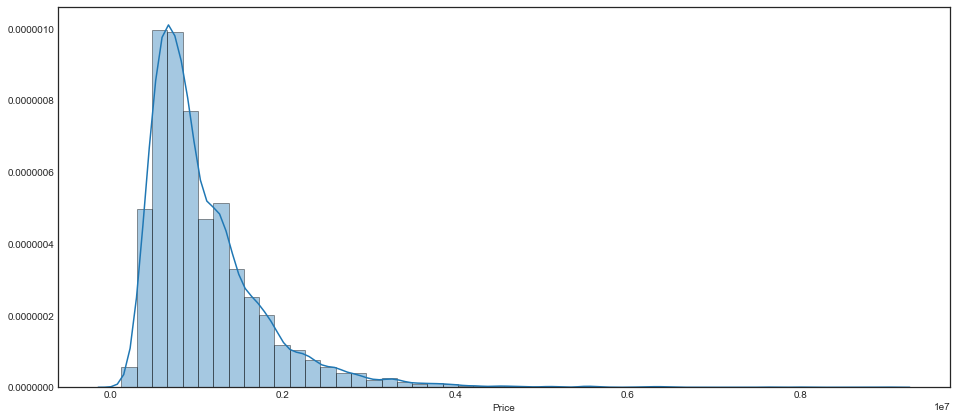

In [24]:
plt.figure(figsize=(16,7))
sns.distplot(housing['Price'] ,hist_kws=dict(edgecolor="k"))

Let's examine how price relates to different variables

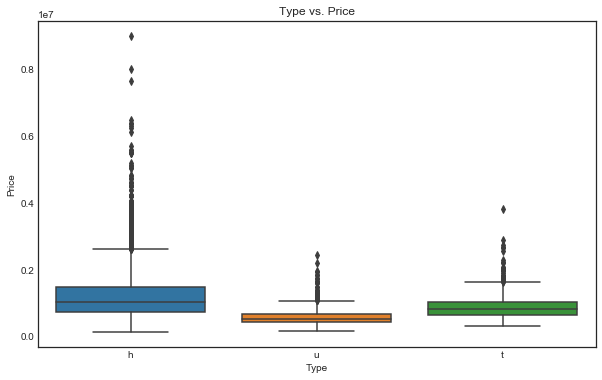

In [25]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Type', y='Price', data=housing)
plt.title('Type vs. Price')

plt.show()

The price pattern shows some variations among different house types and hence house type is a good predictor of price.

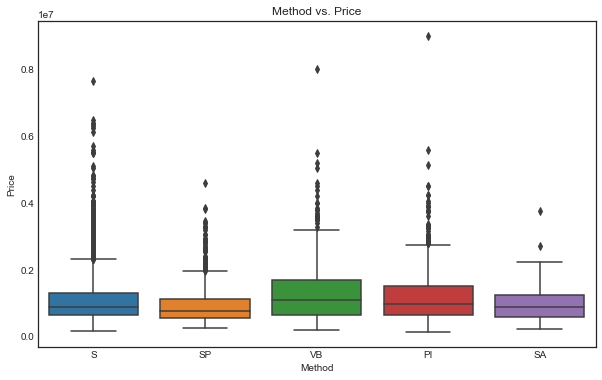

In [26]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Method', y='Price', data=housing)
plt.title('Method vs. Price')

plt.show()

Three of the method types have similar median price. Some methods such as Sold propertys(S), vendor bid (VB) have higher price than properties sold after auction price not disclosed (SS) hence Method is a good predictor of price. 

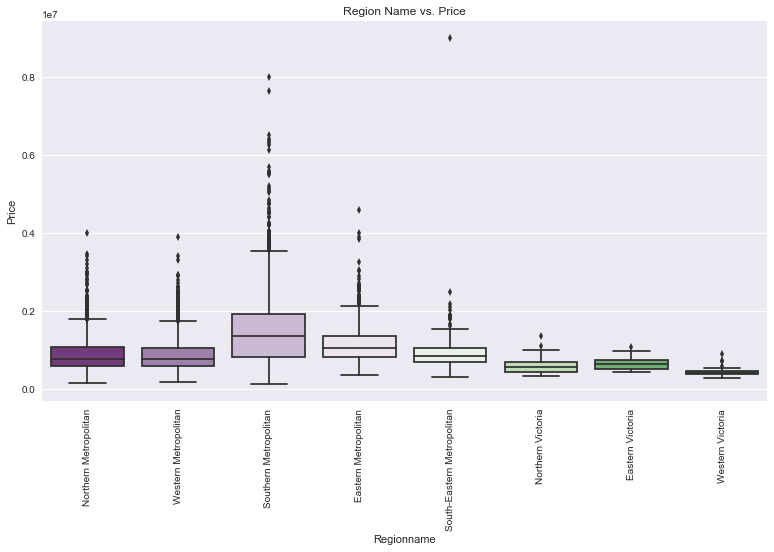

In [27]:
sns.set(rc={'figure.figsize':(13, 7)})
sns.boxplot(x='Regionname', y='Price',
                 data=housing, palette='PRGn')
plt.title('Region Name vs. Price')
plt.xticks(rotation=90)
plt.show()

We expect that house prices will be different in different regions of any city and that region would be a good indicator of prices. Southern metropolitan has the most expensive houses in the city and Western Victoria region has lowest priced houses As shown above. The log price has the better symetry as shown below.  

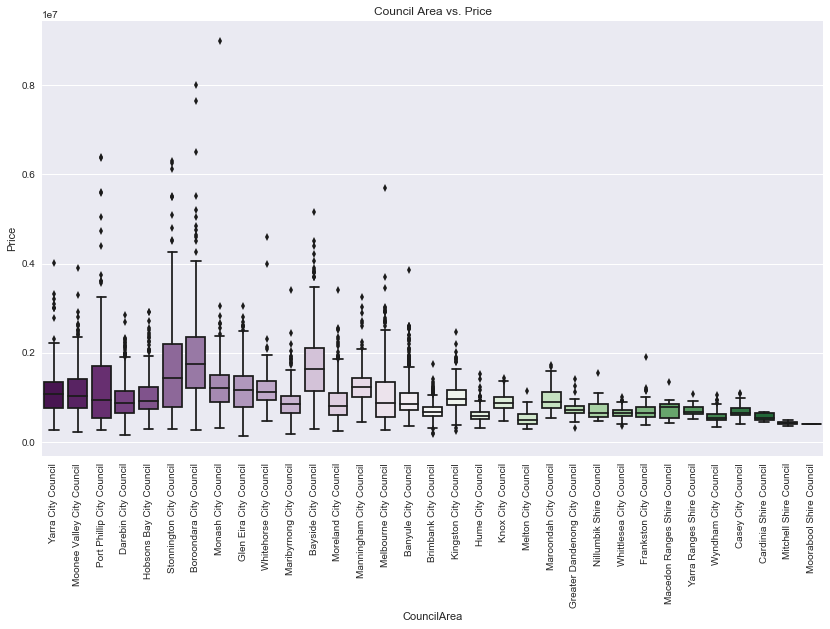

In [90]:
sns.set(rc={'figure.figsize':(14, 8)})
sns.boxplot(x='CouncilArea', y='Price',
                 data=housing, palette='PRGn')
plt.title('Council Area vs. Price')
plt.xticks(rotation=90)
plt.show()

We expect high colinearity between Region Name and Council Area as both of them refer to a geographic location. 

From the plots we've seen so far, we observe that there are many outlier values. The reason looks like actual difference in the range of prices than an error in the data and as a result we will leave the outliers untouched and expect that some of the most robust models we'll use will handle them. 

Earlier we hae added a 'Month' and 'Year' features by extracting them from the date of sales. Let's now see how sales price changes in different months of the year and in the years available in the data. 

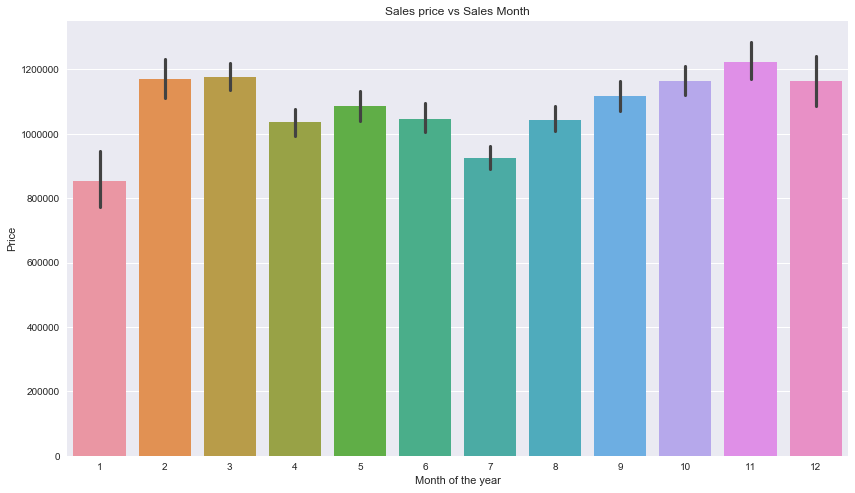

In [29]:
# how does sales vary by month?
sns.barplot(x='Month', y='Price', data=housing)
plt.title('Sales price vs Sales Month')
plt.xlabel('Month of the year')
plt.ylabel('Price')
plt.show()

Houses sold in December seem to be slightly more expensive and houses sold in January and July have notabily lower prices than the rest. We expect the sales month to be a fairly good indicator or price. The price shows only negligible difference in the three years given. It is not a good indicator and we will not use it in our models. 

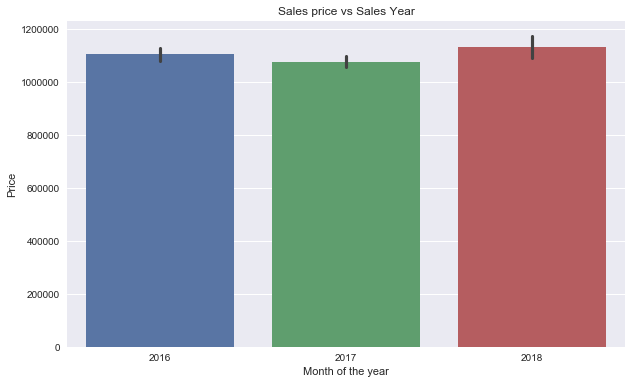

In [30]:
# 
sns.set(rc={'figure.figsize':(10, 6)})
sns.barplot(x='Year', y='Price', data=housing)
plt.title('Sales price vs Sales Year')
plt.xlabel('Month of the year')
plt.ylabel('Price')
plt.show()

No significant difference in pric of housing in the three years 

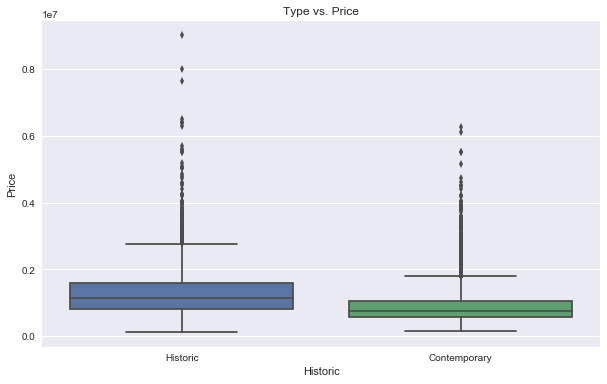

In [31]:
plt.figure(figsize=(10,6))

sns.boxplot(x='Historic', y='Price', data=housing)
plt.title('Type vs. Price')

plt.show()

Historic houses which are older than 50 years have higher selling price 

Now let's examine the relationship between selling price and some of continious variables. 

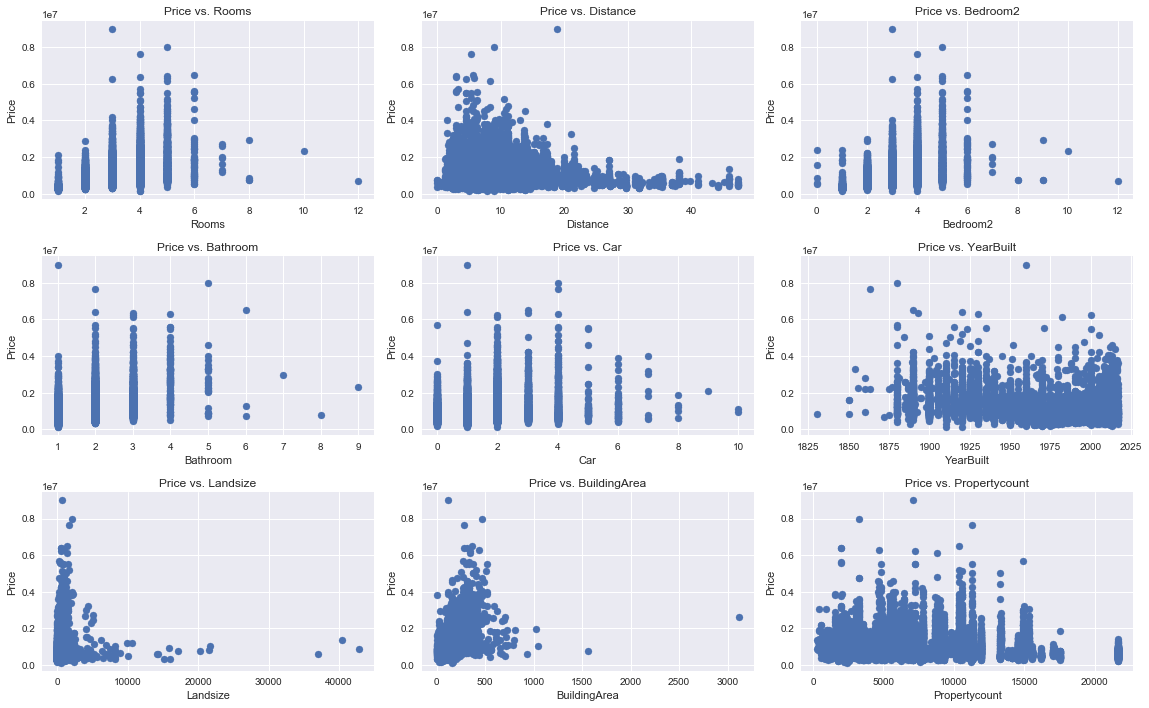

In [32]:
housing_con = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Landsize', 'BuildingArea', 'Propertycount']
plt.figure(figsize=(16,10))
i=1

for col in housing[housing_con]:
    plt.subplot(3,3,i)
    plt.scatter(x=housing[col], y=housing['Price'])
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title('Price vs. {}'.format(col))
    i+=1

plt.tight_layout()
plt.show()

<b>Observations</b>

Price increases with the number of rooms (and bedrooms) for upto five rooms. House prices starts decreasing when the number of rooms goes beyond five. One possible explanation could be that (looking at the distance vs price graph) houses with many rooms need more land area to build which is affordable away from the city center. But again the longer the distance from the city (Distance variable) the cheaper the house gets. That could make the concentration of houses with many rooms away from the city and number of rooms will have less and less effect on the price of the house.

Land size and building area is similar to most houses. Parking spots also have positive corelation to some degree and the corelation is lost after the number of spots exceeds five. The property count doesn't show a clear trend with the price. 

### Correlation

Text(0.5,1,'Correlation')

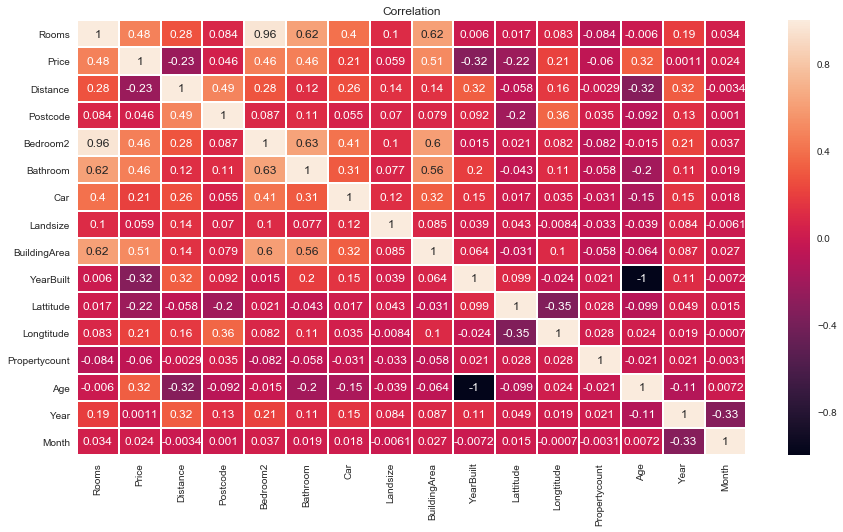

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(housing.corr(),linewidth = 1,annot= True)
plt.title('Correlation')

Variables Rooms, Bedroom2, and Bathroom are relatively closely corelated as they show to measure the same things. Overall the variables have low collinearity. We will use Principal Component Analysis to further cut the number of predicters to a smaller set of uncorelated featurs.   

In [34]:
# Remove unwanted or similar features. 
housing_m = housing.drop(['Date', 'Method', 'Suburb', 'CouncilArea', 'Address', 'Bedroom2', 'SellerG', 'Postcode', 'Historic'], axis=1)

In [35]:
housing_m.head(2)

,Rooms,Type,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,Age,Year,Month
2,2,h,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0,117.0,2016,4
4,3,h,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0,117.0,2017,4


In [36]:
# Our target variable is Price
X = housing_m.drop('Price', 1)
Y = housing_m['Price']
X = pd.get_dummies(X)

In [37]:
Y.shape

(8836,)

In [39]:
X.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age,Year,Month,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,117.0,2016,4,1,0,0,0,0,1,0,0,0,0,0
4,3,2.5,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,117.0,2017,4,1,0,0,0,0,1,0,0,0,0,0
6,4,2.5,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,3.0,2016,4,1,0,0,0,0,1,0,0,0,0,0
11,3,2.5,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,107.0,2016,7,1,0,0,0,0,1,0,0,0,0,0
14,2,2.5,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,127.0,2016,8,1,0,0,0,0,1,0,0,0,0,0


### Try the model without applying PCA and Select K Best

In [48]:
# Split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, Y, test_size = 0.3, random_state = 0)

### Linear Regression 

In [49]:
# Initialize and fit 
start_time = time.clock()
regressor = LinearRegression()
regressor.fit(X_train_raw, y_train_raw)

# Pridict Y
Y_linear_raw = regressor.predict(X_test_raw)


# Scores 

# Cross validation
score = cross_val_score(regressor, X, Y, cv=10).mean()
print(score)

# R squered value
R2 = r2_score(y_test_raw, Y_linear_raw)
print('R2 score:', R2)

# MSE
print('MSE:', mean_squared_error(y_test_raw, Y_linear_raw))

print("--- %s seconds ---" % (time.clock() - start_time))

0.6295332657092486
R2 score: 0.633339540920216
MSE: 172032957695.54843
--- 0.13310981679352096 seconds ---


The R2 score of 0.63 suggests that not enough varience in the target varieble is explained by the model. Linear regression assumes low collinearity between predictors and target varieble. We have seen in the correlation heatmap that some of the variebles are somehow correlated. 

### Random Forest

In [96]:
# Decision tree using GridSearchCV to tune parameters
start_time = time.clock()

#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,500]}
forest_para = {'max_depth': np.arange(10, 100)}

forest = GridSearchCV(RandomForestRegressor(), forest_para, cv=10)
grid_fit = forest.fit(X_train_raw, y_train_raw)

best_forest_raw = grid_fit.best_estimator_
Y_forest = best_forest_raw.predict(X_test_raw)

# Cross validation
score_forest = cross_val_score(best_forest_raw, X, Y, cv=10)
print(score_forest)

# R squered value
R2_forest = r2_score(y_test_raw, Y_forest)
print('R2 score:', R2_forest)

# MSE
print('MSE:', mean_squared_error(y_test_raw, Y_forest))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.78953149 0.80654204 0.72050929 0.75407683 0.76834725 0.80957319
 0.6446614  0.7537976  0.81106705 0.82754761]
R2 score: 0.8143390351053676
MSE: 87110033625.09564
--- 387.4196912724001 seconds ---


In [97]:
score_forest.mean()

0.7685653752441406

The Random Forest model explains more of the varience in the target variable than decision tree and performs better in all other measures. This is due to the way random forest works by making a lot of trees and taking a vote from each tree. 

### Dimentionality reduction using PCA and Select K best

In [40]:
# Select 14 of the 24 features based on f_regression test
# This gave the best result after many trials 
from sklearn.feature_selection import f_regression
selection = SelectKBest(score_func=f_regression, k=14)
X_kbest = selection.fit(X, Y).transform(X)

In [41]:
# transform  
X_kbest_tra = StandardScaler().fit_transform(X_kbest)

In [42]:
# Initiate pca
pca =PCA(n_components=12)

In [43]:
# Fit with selected features
X_pca = pca.fit_transform(X_kbest_tra)

# Varience in pca
varience = pca.explained_variance_ratio_.cumsum()
print('Varience expained by principal components:', varience)

Varience expained by principal components: [0.23938086 0.41495093 0.57883398 0.69430143 0.77614083 0.82850616
 0.86816744 0.90151696 0.93217408 0.95973521 0.97949124 0.99317148]


We used SelectkBest based on f_regression score. f_regression works by calculating the correlation between each regressor and the target. It is then converted to an F score then to a p-value.

In our model, for the number of principal components to explain most of the varience, it has to be close to the number of features selected by select k best method. As a result we will only get minimal reduction using PCA. 

### Train-test split
For all models, we'll use 70% of the data for training and the rest for testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.3, random_state = 42)


### 1. Linear Regression

In [45]:
# Initialize and fit 
start_time = time.clock()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Pridict Y
Y_linear = regressor.predict(X_test)

# Scores 

# Cross validation
score = cross_val_score(regressor, X_pca, Y, cv=10)
print(score)

# R squered value
R2 = r2_score(y_test, Y_linear)
print('R2 score:', R2)

# MSE
print('MSE:', mean_squared_error(y_test, Y_linear))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.57420466 0.69934723 0.68033766 0.60029839 0.63467046 0.63094041
 0.48133492 0.62730342 0.63591138 0.67093718]
R2 score: 0.6696981314825386
MSE: 148502352646.85333
--- 0.05092226172683167 seconds ---


In [91]:
# score on average
print(score.mean())

0.6295332657092486


The model hasn't improved much after dimentionality reduction. The distribution of errors is consistent for all predictors but it is skewed towards the left. 

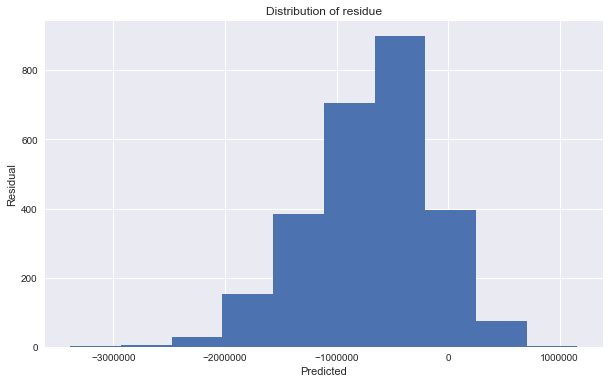

In [46]:
# Normality test
actual = Y
predicted = Y_linear
residual = actual[len(predicted)] - predicted # length of actual is different from
# predicted because of the holdout split
plt.hist(residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Distribution of residue')
plt.show()

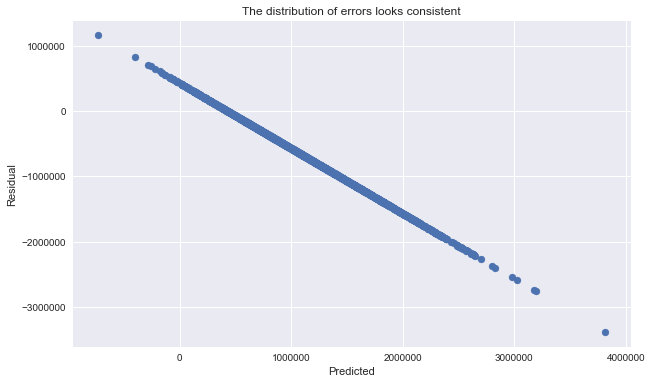

In [47]:
# Homoscedasticity test 
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('The distribution of errors looks consistent')
plt.show()

### 2. KNN regressor 

In [63]:
#Knn regression model

start_time = time.clock()
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(X_train, y_train)

# Pridict Y
Y_knn = knn.predict(X_test)

# Scores 

# Cross validation
score_knn = cross_val_score(knn, X_pca, Y, cv=10)
print(score_knn)

# R squered value
R2_knn = r2_score(y_test, Y_knn)
print('R2 score:', R2_knn)

# MSE
print('MSE:', mean_squared_error(y_test, Y_knn))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.73224574 0.77529216 0.74482614 0.71336714 0.72733305 0.72099613
 0.6185305  0.71425017 0.74459029 0.78168598]
R2 score: 0.7586800430406402
MSE: 108496453592.44408
--- 1.495152851268358 seconds ---


In [64]:
score_knn.mean()

0.7273117291435429

KNN is a more robust model than the linear model above. The model takes the average vote from each neighbour to make prediction and as a result the varience in the target varieble explained by the model has increased. We also get a lower MSE than the linear model. Since MSE is a loss functions, a good model will have a lower MSE error. 

### 3. Decision Tree

In [52]:
# Decision tree using GridSearchCV to tune parameters
start_time = time.clock()

tree_para = {'max_depth': np.arange(10, 100)}

tree = GridSearchCV(DecisionTreeRegressor(random_state=0), tree_para, cv=10)
grid_fit = tree.fit(X_train, y_train)

best_tree = grid_fit.best_estimator_
Y_tree = best_tree.predict(X_test)

# Cross validation
score_tree = cross_val_score(tree, X_pca, Y, cv=10)
print(score_tree)

# R squered value
R2_tree = r2_score(y_test, Y_tree)
print('R2 score:', R2_tree)

# MSE
print('MSE:', mean_squared_error(y_test, Y_tree))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.55149396 0.52159259 0.57474137 0.6115848  0.50706101 0.58862681
 0.41909366 0.63072855 0.5943705  0.48178181]
R2 score: 0.6230692259353166
MSE: 169466515538.78787
--- 1173.606168578632 seconds ---


In [66]:
score_tree.mean()

0.5481075058308265

Decision tree takes longer runtime than KNN and linear models. But it has a lower performance than the two. Decision trees are prone to overfitting when fitted to larger datasets.  

### 4. Random Forest

In [61]:
# Decision tree using GridSearchCV to tune parameters
start_time = time.clock()

#tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150,500]}
forest_para = {'max_depth': np.arange(10, 100)}

forest = GridSearchCV(RandomForestRegressor(), forest_para, cv=10)
grid_fit = forest.fit(X_train, y_train)

best_forest = grid_fit.best_estimator_
Y_forest = best_forest.predict(X_test)

# Cross validation
score_forest = cross_val_score(best_forest, X, Y, cv=10)
print(score_forest)

# R squered value
R2_forest = r2_score(y_test, Y_forest)
print('R2 score:', R2_forest)

# MSE
print('MSE:', mean_squared_error(y_test, Y_forest))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.80679148 0.80399455 0.70922061 0.76586921 0.79420695 0.80616242
 0.65568753 0.79437062 0.8411794  0.83350089]
R2 score: 0.7652422073033276
MSE: 105546131707.07858
--- 530.5463678064516 seconds ---


In [60]:
score_forest.mean()

0.7742314494738797

The random forest model we built earlier with original features has a slightly better performance score than the one above with reduced dimentions. It had lower MSE and higher r squared value. It seems like the by retaining all the information in the predictors, we were able to get a better result and that dimentionality reduction might not always result in a better performance.  

### 5. Ridge Regression

In [56]:
# set timer, fit model 
start_time = time.clock()
ridge = Ridge()
ridge.fit(X_train, y_train)

Y_ridge = ridge.predict(X_test)

# Cross validation
score_ridge = cross_val_score(ridge, X_pca, Y, cv=10)
print(score_ridge)

# R squered value
R2_ridge = r2_score(y_test, Y_ridge)
print('R2 score:', R2_ridge)

# MSE
print('MSE:', mean_squared_error(y_test, Y_ridge))

print("--- %s seconds ---" % (time.clock() - start_time))

[0.57423471 0.69934402 0.68033431 0.60029677 0.63466591 0.63094012
 0.48135675 0.62731257 0.63591775 0.67093167]
R2 score: 0.6696987252267441
MSE: 148502085701.91663
--- 0.06821336243774567 seconds ---


In [93]:
print((score_ridge).mean())

0.623533457028757


Ridge regression works by penalizing large coeficints of predictors which could result from multicilinearity. Since the collinearity in our data is reduced with PCA, the Ridge model hasn't improved the results of the linear regression model we used earlier. 

### 6. Gradient Boosting Algorithm 

learning_rate
This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
Lower values would require higher number of trees to model all the relations and will be computationally expensive.

n_estimators
The number of sequential trees to be modeled (step 2)
Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.

subsample
The fraction of observations to be selected for each tree. Selection is done by random sampling.
Values slightly less than 1 make the model robust by reducing the variance.
Typical values ~0.8 generally work fine but can be fine-tuned further.

In [85]:
start_time = time.clock()
params = {'n_estimators': [300, 400, 500], 'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [2, 5, 10, 20, 50]}
              #'max_features': [1.0, 0.3, 0.1]
                                
print(gb_grid_params)

clf = GradientBoostingRegressor(n_estimators = 400)

gb_clf = GridSearchCV(clf,
                   params,
                   cv=5,
                   scoring='explained_variance',
                   verbose = 3,
                   n_jobs= -1);
gb_clf.fit(X_train, y_train)
predict_train = gb_clf.predict(X_train)
predict_test = gb_clf.predict(X_test)

# Evaluations
score_gb = cross_val_score(gb_clf, X_pca, Y, cv=5)
print(score_gb)

# Meansquare error
mse = mean_squared_error(y_test, gb_clf.predict(X_test))
print("MSE: %.4f" % mse)

# R square
R2_gb = r2_score(y_test, gb_clf.predict(X_test))
print(R2_gb)



print("--- %s seconds ---" % (time.clock() - start_time))

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150]}
Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 27.7min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 33.0min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.1min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.3min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.2min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.0min finished


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   54.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 36.5min finished


[0.78168161 0.77608076 0.77628844 0.72207456 0.81002836]
MSE: 95078835628.4490
0.7885237741706127
--- 12903.54311233839 seconds ---


In [89]:
score_gb.mean()

0.7732307471977311

Gradient boosting takes much longer time to run because it build trees sequentially. We used a five fold cross validation to cut on run time. It has good, MSE, and r square scores. Random forest regression with original features has a slightly better score. 


### Feature importance

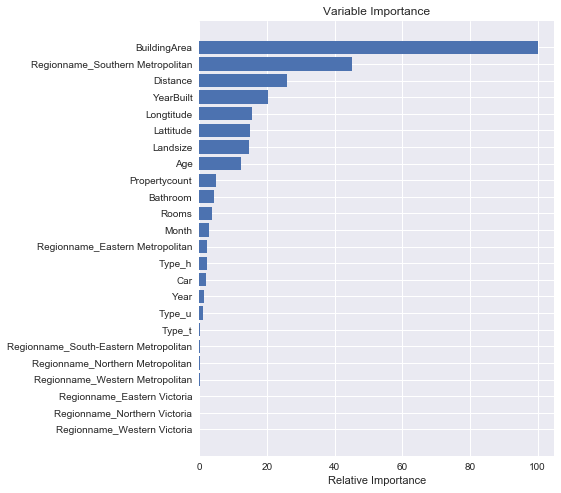

In [98]:
feature_importance = best_forest_raw.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Conclusion

The recommended model for predicting prices is Random Forest Regression. PCA and Select K Best did not result in a better result than the model fit on the original features. 

The feature importance from Random Forest may not be reliable when categorical features are present because Random Forest is biased in favor of features with many levels. But, since our data has limited categorical features with many levels, we can use the model to identify feature importance.

<ul>The most important factors which affect price are:</ul>
<ol>Building area</ol>
<ol>Region name</ol>
<ol>Distance from Melbourne CBD</ol>
<ol>Age of the house, and</ol>
<ol>Location as represented by lattitude and longtitude coordinates</ol>
